In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
plt.rcParams["font.size"] = 16

In [5]:
df = pd.read_csv("wi-covid.csv")
df.head()

,NAME,DATE,POS_7DAYAVG,DTH_NEW,DTH_NEW_2WK
0,Adams,2020-03-16,0.0,0.0,0.0
1,Ashland,2020-03-16,0.0,0.0,0.0
2,Barron,2020-03-16,0.0,0.0,0.0
3,Bayfield,2020-03-16,0.0,0.0,0.0
4,Brown,2020-03-16,0.0,0.0,0.0


In [6]:
df.mean()

POS_7DAYAVG    22.224642
DTH_NEW         0.254104
DTH_NEW_2WK     0.257497
dtype: float64

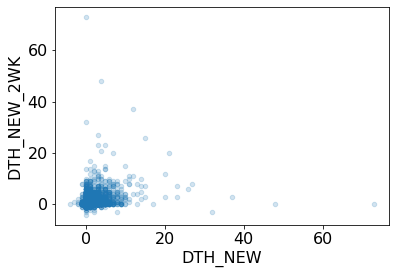

In [9]:
df.plot.scatter(x="DTH_NEW", y="DTH_NEW_2WK", alpha=0.2)

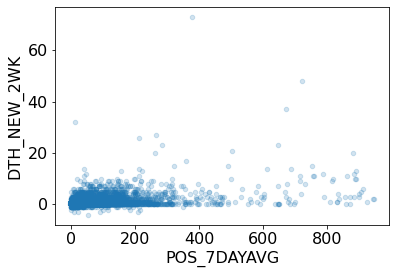

In [10]:
df.plot.scatter(x="POS_7DAYAVG", y="DTH_NEW_2WK", alpha=0.2)

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression() # methods: fit, score, predict

In [16]:
df[["DTH_NEW"]] # x values (must be a DataFrame)

,DTH_NEW
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
25339,0.0
25340,0.0
25341,0.0
25342,1.0


In [17]:
df["DTH_NEW_2WK"] # y values (can be a Series)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
25339    0.0
25340    0.0
25341    0.0
25342    0.0
25343    0.0
Name: DTH_NEW_2WK, Length: 25344, dtype: float64

In [18]:
lr.fit(df[["DTH_NEW"]], df["DTH_NEW_2WK"]) # fit means "train" based on the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
fit_df = pd.DataFrame({"DTH_NEW": range(0, 100)})
fit_df["PREDICTED_DTH_NEW_2WK"] = lr.predict(fit_df)
fit_df

,DTH_NEW,PREDICTED_DTH_NEW_2WK
0,0,0.177424
1,1,0.492544
2,2,0.807665
3,3,1.122786
4,4,1.437907
...,...,...
95,95,30.113901
96,96,30.429022
97,97,30.744142
98,98,31.059263


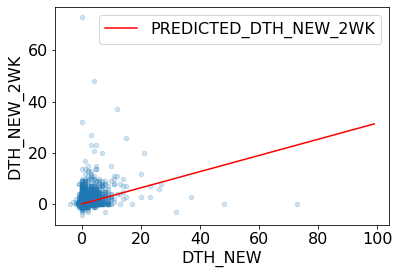

In [29]:
ax = fit_df.plot.line(x="DTH_NEW", y="PREDICTED_DTH_NEW_2WK", color="red")
df.plot.scatter(x="DTH_NEW", y="DTH_NEW_2WK", ax=ax, alpha=0.2)

In [30]:
df["DTH_NEW_2WK"].var()

1.356807623396894

In [31]:
lr.score(df[["DTH_NEW"]], df["DTH_NEW_2WK"]) # how much of the variance is explained by the model

0.09859647954220008

In [32]:
lr = LinearRegression()
lr.fit(df[["POS_7DAYAVG"]], df["DTH_NEW_2WK"])
lr.score(df[["POS_7DAYAVG"]], df["DTH_NEW_2WK"])

0.20341853934974463

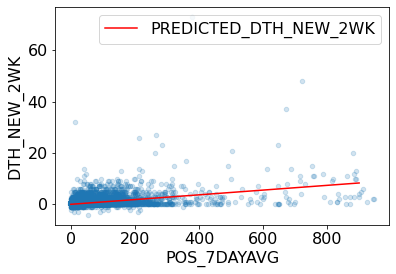

In [35]:
fit_df = pd.DataFrame({"DTH_NEW": range(0, 900)})
fit_df["PREDICTED_DTH_NEW_2WK"] = lr.predict(fit_df)
ax = fit_df.plot.line(x="DTH_NEW", y="PREDICTED_DTH_NEW_2WK", color="red")
df.plot.scatter(x="POS_7DAYAVG", y="DTH_NEW_2WK", ax=ax, alpha=0.2)

In [73]:
from sklearn.model_selection import train_test_split

In [94]:
train_df, test_df = train_test_split(df, test_size=0.1)

In [95]:
train_df

,NAME,DATE,POS_7DAYAVG,DTH_NEW,DTH_NEW_2WK
23614,Green Lake,2021-01-18,3.00,0.0,0.0
16919,Douglas,2020-10-19,10.29,0.0,0.0
24042,Outagamie,2021-02-07,43.43,0.0,0.0
4994,Oconto,2020-04-10,0.29,0.0,0.0
2766,Vilas,2020-05-08,0.00,0.0,0.0
...,...,...,...,...,...
8562,Grant,2020-08-14,5.86,0.0,0.0
10991,Green,2020-07-23,0.86,0.0,0.0
20130,Monroe,2020-11-23,52.71,0.0,0.0
8415,Barron,2021-02-05,10.14,1.0,0.0


In [96]:
test_df

,NAME,DATE,POS_7DAYAVG,DTH_NEW,DTH_NEW_2WK
11578,Sawyer,2020-07-25,0.29,0.0,0.0
22252,Marathon,2020-12-20,57.43,0.0,0.0
9677,Rock,2020-07-09,14.29,0.0,0.0
16020,Bayfield,2020-09-30,3.71,0.0,0.0
11124,Fond du Lac,2020-07-29,7.86,-1.0,1.0
...,...,...,...,...,...
3453,Dodge,2020-03-20,0.00,0.0,0.0
14430,Outagamie,2020-09-15,77.71,0.0,0.0
6919,Ashland,2020-06-01,0.00,0.0,0.0
9192,Sheboygan,2020-08-16,13.71,0.0,1.0


In [97]:
lr = LinearRegression()
lr.fit(train_df[["POS_7DAYAVG"]], train_df["DTH_NEW_2WK"])
lr.score(test_df[["POS_7DAYAVG"]], test_df["DTH_NEW_2WK"])

0.11317703487252628

In [98]:
lr.score(train_df[["POS_7DAYAVG"]], train_df["DTH_NEW_2WK"])

0.21033231150731835